<h1 style="text-align: center">
<div style="color: #DD3403; font-size: 60%">Data Science DISCOVERY MicroProject</div>
<span style="">MicroProject #5: Bechdel Test</span>
<div style="font-size: 60%;"><a href="https://discovery.cs.illinois.edu/microproject/bechdel-test/">https://discovery.cs.illinois.edu/microproject/bechdel-test/</a></div>
</h1>

<hr style="color: #DD3403;">

## Data Source: Bechdel Test

The Bechdel Test is a simple way of measuring the representation of women in a film or other work of fiction.  A work earns points for each of three criteria:

1. The work must have at least two women in it,

2. who talk to each other,

3. about something other than a man.

The test was popularized by Alison Bechdel's 1985 comic strip called "The Rule" and has grown in popularity as a simple way to measure the representation of women in works of fiction.  The website [BechdelTest.com](BechdelTest.com) provides both a searchable database and a publicly-available API that includes over 10,000 films and their Bechdel Test ratings, allowing users to explore and analyze patterns in gender representation in cinema.

In this MicroProject, you will explore using a JSON-based API, grouping data using a pivot table (`df.pivot_table(...)`), and creating a stacked area chart to create a data visualization that shows the change in Bechdel Test ratings over time.  Let's nerd out! 🎉


### Background Knowledge

To finish this MicroProject, we assume you already know:

- All topics covered in *DISCOVERY Module 1: Basics of Data Science with Python* ([review the module here](https://discovery.cs.illinois.edu/learn/))
- Adding new rows and columns into an existing DataFrame ([review creating new columns here](https://discovery.cs.illinois.edu/guides/Modifying-DataFrames/adding-columns-in-dataframes/))
- Grouping data in Python ([reviewing grouping data in Python](https://discovery.cs.illinois.edu/learn/Exploratory-Data-Analysis/Grouping-Data-in-Python/))

Let's get started! :)


<hr style="color: #DD3403;">

## Part 1: Importing the Bechdel Test Dataset

The [bechdeltest.com](http://bechdeltest.com) had previously provided an API as an easy-to-access data source that contains the Bechdel Test ratings for thousands of movies.  The API provided a list of over 10,000 movies in a commonly used format called "JSON" that can be read in using `pd.read_json(...)`.

- Since their API has been removed, we have provided a local cache of the their API data for you at `https://waf-server-01.cs.illinois.edu/static/getAllMovies.json`.

Using `pd.read_json`, create a DataFrame `df_bechdel` to store all the movies and their Bechdel Test ratings:

In [2]:
import pandas as pd

# Create a DataFrame of all movies and their Bechdel Test scores by using pd.read_json()
# to read the API endpoint:
#    https://waf-server-01.cs.illinois.edu/static/getAllMovies.json

df_bechdel = pd.read_json('https://waf-server-01.cs.illinois.edu/static/getAllMovies.json')
df_bechdel

,imdbid,rating,year,id,title
0,3155794,0,1874,9602,Passage de Venus
1,14495706,0,1877,9804,La Rosace Magique
2,2221420,0,1878,9603,Sallie Gardner at a Gallop
3,12592084,0,1878,9806,Le singe musicien
4,7816420,0,1881,9816,Athlete Swinging a Pick
...,...,...,...,...,...
10557,29603959,1,2025,11779,Novocaine
10558,30840798,3,2025,11785,"Phoenician Scheme, The"
10559,32550101,3,2025,11786,Straw
10560,30253473,3,2025,11787,Materialists


### Cleaning the Dataset

The DataFrame you collected comes from BechdelTest.com, containing their collection of data.  As with many real data sources, there may be typos, errors, or incorrect values in the data.

For example, the 2000 film *["Grandma Got Run Over by a Reindeer"](https://www.imdb.com/title/tt0267536/)* was incorrectly listed as being released in the year 200 instead of 2000 -- that's a big difference!!  (*We reported this error and they it has been fixed by BechdelTest.com, but there may be others*.)

Additionally, many of the early films in the dataset, including 1874's *["Passage de Venus"](https://www.imdb.com/title/tt3155794/)*, are technical films at the very beginning of "motion pictures".  *Passage de Venus*, for example, is a six-second film showing Venus pass between the Earth and the Sun and not a work of fiction that would be traditionally analyzed using the Bechdel Test.

To limit our data to modern film and remove any erroneous data, create a new DataFrame `df_clean` that contains the data from `df_bechdel` where:

1. All movies made before 1900 are removed.  *(The data in `df_clean` should only be movies made in 1900 or later.)*
2. All movies made in the future are removed.  *(It's impossible to have a movie from 2035 in 2025.)*

In [3]:
# Create a new DataFrame `df_clean` from `df_bechdel` with only movies made in/after 1900 AND not in the future:
df_clean = df_bechdel[(df_bechdel['year'] >= 1900) & (df_bechdel['year'] <= 2025)]
df_clean

,imdbid,rating,year,id,title
86,0291476,0,1900,1594,Sherlock Holmes Baffled
87,0000300,0,1900,4271,"Enchanted Drawing, The"
88,0000304,0,1900,4343,Grandma&#39;s Reading Glass
89,0000272,0,1900,4344,As Seen Through A Telescope (a.k.a The Profess...
90,0257654,0,1900,4345,Explosion of a Motor Car (a.k.a The Dlights of...
...,...,...,...,...,...
10557,29603959,1,2025,11779,Novocaine
10558,30840798,3,2025,11785,"Phoenician Scheme, The"
10559,32550101,3,2025,11786,Straw
10560,30253473,3,2025,11787,Materialists


In [4]:
### TEST CASE for Part 1: Importing the Bechdel Test Dataset
tada = "\N{PARTY POPPER}"

import datetime
assert( "df_bechdel" in vars() ), "You must define a Python variable named `df_bechdel`."
assert( "df_clean" in vars() ), "You must define a Python variable named `df_clean`."
assert( "year" in df_bechdel ), "The DataFrame stored in the variable `df_bechdel` must come from the BechdelTest.com API."
assert( len(df_bechdel.columns) == len(df_clean.columns) ), "The DataFrames `df_bechdel` and `df_clean` must both be data from the BechdelTest.com API."
assert( df_bechdel.year.min() < 1900 ), "The DataFrame `df_bechdel` must contain ALL data from the BechdelTest.com API; only `df_clean` should contain the filtered data."
assert( df_clean.year.min() == 1900 ), "The DataFrame `df_clean` must NOT contain any movies made before 1900."
assert( df_clean.year.max() <= datetime.datetime.now().year ), "The DataFrame `df_clean` must NOT contain any movies in the future."
assert( len(df_bechdel) > len(df_clean) ), "The DataFrame `df_bechdel` must have more rows than the filtered DataFrame `df_clean`."
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


<hr style="color: #DD3403;">

## Part 2: Creating a Pivot Table for Analysis

With over 10,000 movies that were released over 100 years, creating a summary of our data may be helpful for analysis!  Specifically, it would be very useful to get a breakdown of the **number of movies for each Bechdel Test rating from every year**.

In the simplest terms, we would crete a dataset with the following overall structure:
- In 1900, there were 11 movies all with a `0` score.
- In 1910, there were 2 movies with a `0` score and 1 movie with a `3` score.
- In 1989, there were 81 movies; 12 with a `0`, 16 with a `1`, 11 with a `2`, and 41 with a `3` score.

Translating this design idea to a table, a simple design for the table would have:
- Each **row** of our table to be a year,
- Each **column** of our table to be a score (0, 1, 2, and 3),  **AND**
- The **values** inside of our table to **count** the number of times a movie was made in that year with that specific rating.

That means the table would look something like:

| Year | 0 | 1 | 2 | 3 |
| ---- | - | - | - | - |
| 1900 | 11 | 0 | 0 | 0 |
| ... |
| 1910 | 2 | 0 | 0 | 1 |
| ... |
| 1989 | 12 | 16 | 11 | 41 |
| ... |

### Part 2.1: Starting a Pivot Table with `index` and `aggfunc`:

The **groupby** and **pivot table** operations are two different ways to summarize a DataFrame using pandas.  In general, the `groupby` operation resembles how databases work and the `pivot_table` operation resembles how spreadsheets works, but both methods can create almost any summary of data!

To make a **pivot table**, you specify the structure of the table you want pandas to generate along with how you want multiple rows to be combined (or aggregated) together.

The simplest of pivot tables require us two specify only two things:

1. What column name in our original DataFrame do we want to use for the row labels for our pivot table?  (*This is called the `index` in a pivot table.*)
2. How do we want to combine multiple rows together?  (*This is called the `aggfunc` in a pivot table.*)

For example, if we want to **count** the number of movies with unique values for **`rating`**, our initial pivot table can be created using the following code:

> ```py
> df_clean.pivot_table(index="rating", aggfunc="count")
> #                    ^^^^^^^^^^^^^^ --- Each row should be one score.
> #                                   ^^^^^^^^^^^^^^^ --- Summarize by counting the number of rows
> ```

Create your first pivot table, and store it in a Python variable `df`, that summarizes your cleaned DataFrame, `df_clean`, by counting the number of films receiving each of the four ratings:

In [7]:
# Create your first pivot table, and store it in a Python variable `df`,
# that summarizes your cleaned DataFrame, `df_clean`, by counting the
# number of films receiving each of the four ratings:
df = df_clean.pivot_table(index = 'rating', aggfunc='count')
df

,id,imdbid,title,year
rating,,,,
0,1075,1075,1075,1075
1,2274,2274,2274,2274
2,1089,1089,1089,1089
3,6038,6038,6038,6038


In [8]:
### TEST CASE for Part 2.1: Starting a Pivot Table
tada = "\N{PARTY POPPER}"
assert( "df" in vars() ), "You must define a Python variable named `df`."
assert( len(df) == len(df_clean.rating.unique()) ), "Your pivot table stored in the variable `df` must have exactly one row for each rating."
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### Part 2.2: Creating a Pivot Table for Years

Using what you know, create another pivot table.  However, in this new pivot table **summarize the count of how many films are in the dataset for each year** instead each row being a rating.  Just as before, store the pivot table you created in the Python variable `df`:



In [9]:
df = df_clean.pivot_table(index = 'year', aggfunc='count')
df

,id,imdbid,rating,title
year,,,,
1900,11,11,11,11
1901,3,3,3,3
1902,4,4,4,4
1903,5,5,5,5
1904,4,4,4,4
...,...,...,...,...
2021,191,191,191,191
2022,202,202,202,202
2023,161,161,161,161


In [10]:
### TEST CASE for Part 2.2: Creating a Pivot Table for Years
tada = "\N{PARTY POPPER}"
assert( "df" in vars() ), "You must define a Python variable named `df`."
assert( len(df) == len(df_clean.year.unique()) ), "Your pivot table stored in the variable `df` must have exactly one row for each year."
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### Part 2.3: Columns in a Pivot Table

The pivot table you have just created contains the **count of the number rows with data** for year/column combinations.

For example, looking at your pivot table above, if the year `1900` reports **11** for the column `rating`, our pivot table informs us that there were **11** movies in the dataset that contains a data in the column `rating` when the year was `1900`. However, we want to know the breakdown of Bechdel Test scores for those 11 movies.

The pivot table you created has two function parameters so far: `index` and `aggfunc`.  The third function parameter we will include is `columns`. The value set for the `columns` parameter will specify what column from the original DataFrame should be presented in each column.  This `columns` value is combined together with the rows value (`index`) we already have specified.

Now, create a pivot table with three function parameters:

- Each row (`index` parameter) in our pivot table is one year from the original DataFrame,
- Each column (`columns` parameter) in our pivot table is one rating from the original DataFrame, **and**
- The values are aggregated together by the `"count"` function (`aggfunc` parameter).

Call this pivot table `df` and we'll check to make sure it looks good:

In [12]:
df = df_clean.pivot_table(index = 'year', aggfunc = 'count', columns= 'rating')
df

id                    imdbid                    title              \
rating     0     1     2      3      0     1     2      3     0     1     2   
year                                                                          
1900    11.0   NaN   NaN    NaN   11.0   NaN   NaN    NaN  11.0   NaN   NaN   
1901     3.0   NaN   NaN    NaN    3.0   NaN   NaN    NaN   3.0   NaN   NaN   
1902     4.0   NaN   NaN    NaN    4.0   NaN   NaN    NaN   4.0   NaN   NaN   
1903     5.0   NaN   NaN    NaN    5.0   NaN   NaN    NaN   5.0   NaN   NaN   
1904     4.0   NaN   NaN    NaN    4.0   NaN   NaN    NaN   4.0   NaN   NaN   
...      ...   ...   ...    ...    ...   ...   ...    ...   ...   ...   ...   
2021    14.0  35.0  17.0  125.0   14.0  35.0  17.0  125.0  14.0  35.0  17.0   
2022    13.0  33.0  17.0  139.0   13.0  33.0  17.0  139.0  13.0  33.0  17.0   
2023    11.0  24.0  18.0  108.0   11.0  24.0  18.0  108.0  11.0  24.0  18.0   
2024     7.0  20.0   8.0   75.0    7.0  20.0   8.0   75.0   7.0  20.0   8.0   
2025     NaN   5.0   4.0   16.0    NaN   5.0   4.0   16.0   NaN   5.0   4.0   

               
rating      3  
year           
1900      NaN  
1901      NaN  
1902      NaN  
1903      NaN  
1904      NaN  
...       ...  
2021    125.0  
2022    139.0  
2023    108.0  
2024     75.0  
2025     16.0  

[125 rows x 12 columns]

In [13]:
### TEST CASE for Part 2.3: Columns in a Pivot Table
tada = "\N{PARTY POPPER}"
assert( len(df) == len(df_clean["year"].unique()) ), "You should have one row for each year, but your `df` does not. Make sure your `index` parameter is correct."
assert( len(df.columns) == (len(df_clean.columns) - 2) * 4 ), "You should have a 0,1,2,3 column for each variable. Make sure your `columns` parameter is correct. "
assert( df["id", 0][2021] == len(df_clean[ (df_clean.year == 2021) & (df_clean.rating == 0) ]) ), "You have the incorrect number of movies with a 0 rating in 2021. Make sure your `aggfunc` parameter is correct."
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### Part 2.4: Adding the `values` Parameter to your Pivot Table

In your latest pivot table, you have a summary for the number of movies rated `0`, `1`, `2`, and `3` for every year of data in the dataset, but it is repeated for every `id` record, every `imdbid`, and every `title`.  It's a lot of extra columns! 😢

The `values` parameter allows us to specify the columns from the original DataFrame we want to keep in our pivot table.  Currently, we have three columns of data we aren't doing anything specific with except aggregating them together: `id`, `imdbid`, and `title`.  We do not need all three.

Since all three columns are identical, it's completely up to you to choose any one of the three columns to keep as the `values` that we're going to analyze.

- Do you want to keep the count of how many movies have data for the `id` column in your original dataset?  If so, use `values="id"`.
- Do you want to keep the count of how many movies have data for the `imdbid` column in your original dataset?  If so, use `values="imdbid"`.
- Do you want to keep the count of how many movies have data for the `title` column in your original dataset?  If so, use `values="title"`.

Extend your pivot table to now include all **four** parameters (`index`, `aggfunc`, `columns` and `values`) and store your improved pivot table in the variable `df`:

In [14]:
df = df_clean.pivot_table(index = 'year', aggfunc = 'count', columns= 'rating', values ='id')
df

rating,0,1,2,3
year,,,,
1900,11.0,NaN,NaN,NaN
1901,3.0,NaN,NaN,NaN
1902,4.0,NaN,NaN,NaN
1903,5.0,NaN,NaN,NaN
1904,4.0,NaN,NaN,NaN
...,...,...,...,...
2021,14.0,35.0,17.0,125.0
2022,13.0,33.0,17.0,139.0
2023,11.0,24.0,18.0,108.0


In [15]:
### TEST CASE for Part 2.4: Adding the values Parameter to your Pivot Table
tada = "\N{PARTY POPPER}"
assert( len(df) == len(df_clean["year"].unique()) ), "You should have one row for each year, but your `df` does not. Make sure your `index` parameter is correct."
assert( len(df.columns) == 4 ), "You should have a single 0,1,2,3 column. Make sure your `columns` parameter is correct. "
assert( df[3][2021] == len(df_clean[ (df_clean.year == 2021) & (df_clean.rating == 3) ]) ), "You have the incorrect number of movies with a 3 rating in 2021. Make sure your `aggfunc` parameter is correct."
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### Part 2.5: Specify the `fill_value`

Finally, you may notice that there are no movies with a **3** in any of the early 1900s.  Since there is no data for that row/column combination, pandas leaves the value blank and reports a `NaN` or "Not a Number".

The `fill_value` parameter allows us to give a default value when there is no data.  Since we know no data indicates that there were zero movies that that rating in our dataset, setting `fill_value=0` fills all the missing data with zeroes.  

Extend your pivot table to have **five** parameters, ensuring that empty values get replaced with a `0`:

In [16]:
df = df_clean.pivot_table(index = 'year', aggfunc = 'count', columns= 'rating',values = 'id', fill_value=0)
df

rating,0,1,2,3
year,,,,
1900,11,0,0,0
1901,3,0,0,0
1902,4,0,0,0
1903,5,0,0,0
1904,4,0,0,0
...,...,...,...,...
2021,14,35,17,125
2022,13,33,17,139
2023,11,24,18,108


In [17]:
### TEST CASE for Step 2.5: Specify the fill_value
tada = "\N{PARTY POPPER}"
assert( len(df) == len(df_clean["year"].unique()) ), "You should have one row for each year, but your `df` does not. Make sure your `index` parameter is correct."
assert( len(df.columns) == 4 ), "You should have a single 0,1,2,3 column. Make sure your `columns` parameter is correct. "
assert( df[3][2021] == len(df_clean[ (df_clean.year == 2021) & (df_clean.rating == 3) ]) ), "You have the incorrect number of movies with a 3 rating in 2021. Make sure your `aggfunc` parameter is correct."
assert( len(df.dropna()) == len(df) ), "You have some NaN values remaining. Make sure your `fill_value` parameter is correct."
assert( ("int" in str(df[2].dtype)) or ("float" in str(df[2].dtype)) ), "The data for the ratings must be numbers. Make sure your `fill_value` is set to `0` (a number) and not a string."
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


<hr style="color: #DD3403;">

## Part 3: Visual Analysis of the Data

You have an extremely detailed summary of the entire Bechdel Test dataset -- over 10,000 movies across more than 100 years!  A simple exploratory data visualization would help us understand all of this data and a line chart is a great way to get started!

Create a simple line chart by using `df.plot.line()`, no parameters needed:

<Axes: xlabel='year'>

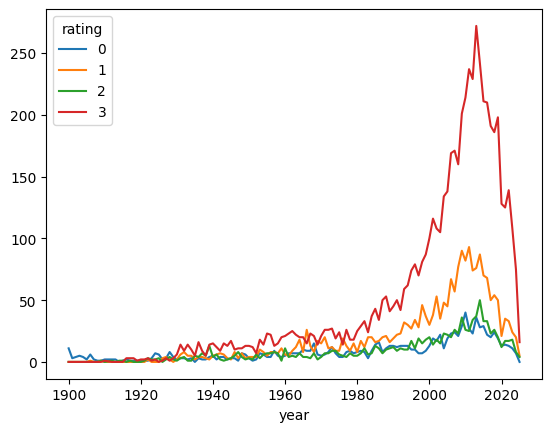

In [18]:
df.plot.line()

### Part 3.1: Transforming Counts into Proportions

In the graph above, you can see that the **total number of movies** in the dataset has increased dramatically from the 1900s until today.  However, except for seeing that the number of movies increased, it's impossible to tell if movies are scoring, on average, higher or lower today than they did in the early 1900s.

A useful visualization to help determine the change in the promotion of data is a **stacked area chart**.  A stacked area chart is similar to a stacked bar chart where each data value will be stacked on top of the previous data.  The most common application of a stacked area chart is graphing different proportions of data.

To create a graph of the proportion of movies at reach ranking, add the following four additional columns to your DataFrame `df`:

- `"%0"`, that contains the percentage of movies with a `0` ranking in a given year,
- `"%1"`, that contains the percentage of movies with a `1` ranking in a given year,
- `"%2"`, that contains the percentage of movies with a `2` ranking in a given year,
- `"%3"`, that contains the percentage of movies with a `3` ranking in a given year,
- *Hint: You may find adding a `"Total"` column helpful to make your calculations easier.*

Note that the `0`,`1`,`2`,`3` column names are integers, not strings.

In [26]:
df['Total'] = df[0] + df[1]+df[2]+df[3]

df["%0"] = df[0] / df['Total']
df["%1"] = df[1] / df['Total']
df["%2"] = df[2] / df['Total']
df["%3"] = df[3] / df['Total']
df

rating,0,1,2,3,%0,%1,%2,%3,Total
year,,,,,,,,,
1900,11,0,0,0,1.000000,0.000000,0.000000,0.000000,11
1901,3,0,0,0,1.000000,0.000000,0.000000,0.000000,3
1902,4,0,0,0,1.000000,0.000000,0.000000,0.000000,4
1903,5,0,0,0,1.000000,0.000000,0.000000,0.000000,5
1904,4,0,0,0,1.000000,0.000000,0.000000,0.000000,4
...,...,...,...,...,...,...,...,...,...
2021,14,35,17,125,0.073298,0.183246,0.089005,0.654450,191
2022,13,33,17,139,0.064356,0.163366,0.084158,0.688119,202
2023,11,24,18,108,0.068323,0.149068,0.111801,0.670807,161


In [27]:
### TEST CASE for Part 3.1: Transforming Counts into Proportions
tada = "\N{PARTY POPPER}"
import math
assert( "%0" in df.columns ), "Make sure you have a \"%0\" column."
assert( "%1" in df.columns ), "Make sure you have a \"%1\" column."
assert( "%2" in df.columns ), "Make sure you have a \"%2\" column."
assert( "%3" in df.columns ), "Make sure you have a \"%3\" column."
assert( math.isclose( df.loc[2020]["%0"], len(df_clean[ (df_clean.year == 2020) & (df_clean.rating == 0) ]) / len(df_clean[ (df_clean.year == 2020) ]) )), "Your calculation of %0 is incorrect."
assert( math.isclose(df.loc[2019]["%1"], len(df_clean[ (df_clean.year == 2019) & (df_clean.rating == 1) ]) / len(df_clean[ (df_clean.year == 2019) ]))), "Your calculation of %1 is incorrect."
assert( math.isclose(df.loc[2018]["%2"], len(df_clean[ (df_clean.year == 2018) & (df_clean.rating == 2) ]) / len(df_clean[ (df_clean.year == 2018) ]))), "Your calculation of %2 is incorrect."
assert( math.isclose(df.loc[2017]["%3"], len(df_clean[ (df_clean.year == 2017) & (df_clean.rating == 3) ]) / len(df_clean[ (df_clean.year == 2017) ]))), "Your calculation of %3 is incorrect."
print(f"{tada} All tests passed! {tada}")


🎉 All tests passed! 🎉


### Part 3.2: Finding the Percentage of Movies Per Year with Each Rating:

To visualize only the percentage columns, create a new `df_pct` that contains only the `%0`, `%1`, `%2`, and `%3` columns:

In [28]:
df_pct = df[['%0','%1','%2','%3']]
df_pct

rating,%0,%1,%2,%3
year,,,,
1900,1.000000,0.000000,0.000000,0.000000
1901,1.000000,0.000000,0.000000,0.000000
1902,1.000000,0.000000,0.000000,0.000000
1903,1.000000,0.000000,0.000000,0.000000
1904,1.000000,0.000000,0.000000,0.000000
...,...,...,...,...
2021,0.073298,0.183246,0.089005,0.654450
2022,0.064356,0.163366,0.084158,0.688119
2023,0.068323,0.149068,0.111801,0.670807


In [29]:
### TEST CASE for Part 3.2: Finding the Percentage of Movies Per Year with Each Rating
tada = "\N{PARTY POPPER}"

assert( "df_pct" in vars() ), "Make sure you have defined the DataFrame `df_pct`."
assert( "%0" in df_pct.columns ), "Make sure you have a \"%0\" column."
assert( "%1" in df_pct.columns ), "Make sure you have a \"%1\" column."
assert( "%2" in df_pct.columns ), "Make sure you have a \"%2\" column."
assert( "%3" in df_pct.columns ), "Make sure you have a \"%3\" column."
assert( len(df_pct.columns) == 4 ), "Make sure you only have the percentage columns in `df_pct`."

print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### Part 3.3: Visualizing the Percentage of Movies / Year with Each Rating:

Since `df_pct` has rows that always add up to `1`, this data is **PERFECT** for a stacked area graph.  In the cell below, `df.plot.area()` is used to create a stacked area visualization to view the growth of the percentage of each movie's rating. Run the cell to view the graph!

<Axes: title={'center': 'Percentage of Movies with Each Bechdel Test Score Per Year'}, xlabel='year'>

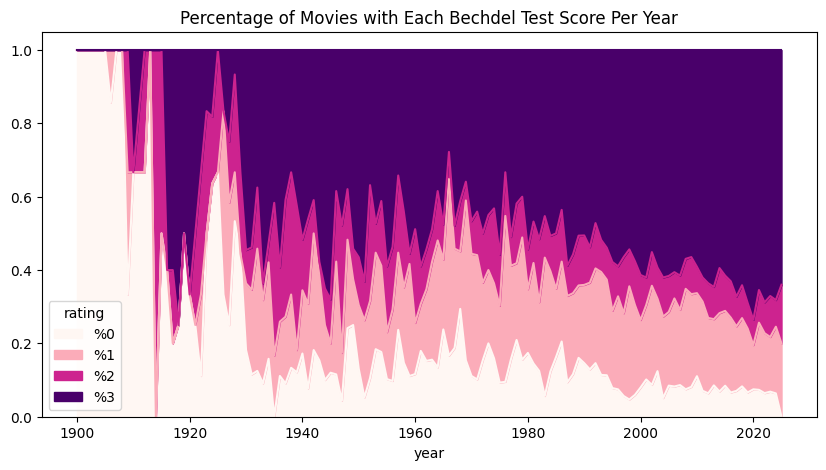

In [30]:
df_pct.plot.area(figsize=(10,5), title="Percentage of Movies with Each Bechdel Test Score Per Year", colormap="RdPu")

### Area Chart Analysis

The stacked area chart shows the proportion of movies with a score of `0`, `1`, `2`, and `3`. Here are some questions to think about:
- Has the proportion of movies rated as `3` generally increased over the past century?
- Were there periods of time where the general trend reversed?

And feel free to nerd out with this visualization:
- You can change the colors used in this visualization, and any other visualization, by changing the `colormap` parameter.  The page [Choosing Colormaps in Matplotlib](https://matplotlib.org/stable/users/explain/colors/colormaps.html) lists all of the available colormaps included with pandas!
- Feel free to add `grid=True`, which will help with data analysis as it is well known that it's tricky for humans to imagine a straight line when the background is slanted.  (It's really crazy how different the data looks with grid lines turned on!)
- Finally, you're free to change this graph an any other way you want! It's your graph to transform! :)

<hr style="color: #DD3403;">

## Submission

You're almost done!  All you need to do is to commit your lab to GitHub and run the GitHub Actions Grader:

1.  ⚠️ **Make certain to save your work.** ⚠️ To do this, go to **File => Save All**

2.  After you have saved, exit this notebook and return to https://discovery.cs.illinois.edu/microproject/bechdel-test/ and complete the section **"Commit and Grade Your Notebook"**.

3. If you see a 100% grade result on your GitHub Action, you've completed this MicroProject! 🎉